In [20]:
# Using Clustering for Preprocessing
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

In [46]:
# Classification without clustering
X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)
print(log_reg.score(X_test, y_test))

# Classification with clustering

from sklearn.pipeline import Pipeline
model_pip = Pipeline([("kmeans" , KMeans(n_clusters=50,random_state=42)),
                      ("log_reg" , LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))])
model_pip.fit(X_train, y_train)
print(model_pip.score(X_test, y_test))

0.9511111111111111
0.9866666666666667


In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters = range(2,100))
grid_clf = GridSearchCV(model_pip,param_grid,cv=3, verbose=2)
grid_clf.fit (X_train, y_train)
print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test))


Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.3s
[CV] END ...............................kmeans_

[CV] END ..............................kmeans__n_clusters=35; total time=   5.3s
[CV] END ..............................kmeans__n_clusters=36; total time=   6.4s
[CV] END ..............................kmeans__n_clusters=36; total time=   5.1s
[CV] END ..............................kmeans__n_clusters=36; total time=   4.8s
[CV] END ..............................kmeans__n_clusters=37; total time=   6.6s
[CV] END ..............................kmeans__n_clusters=37; total time=   5.0s
[CV] END ..............................kmeans__n_clusters=37; total time=   5.9s
[CV] END ..............................kmeans__n_clusters=38; total time=   7.6s
[CV] END ..............................kmeans__n_clusters=38; total time=   5.8s
[CV] END ..............................kmeans__n_clusters=38; total time=   5.8s
[CV] END ..............................kmeans__n_clusters=39; total time=   6.9s
[CV] END ..............................kmeans__n_clusters=39; total time=   5.5s
[CV] END ...................

[CV] END ..............................kmeans__n_clusters=69; total time=   7.1s
[CV] END ..............................kmeans__n_clusters=70; total time=   7.8s
[CV] END ..............................kmeans__n_clusters=70; total time=   6.3s
[CV] END ..............................kmeans__n_clusters=70; total time=   4.5s
[CV] END ..............................kmeans__n_clusters=71; total time=   7.4s
[CV] END ..............................kmeans__n_clusters=71; total time=   5.8s
[CV] END ..............................kmeans__n_clusters=71; total time=   7.8s
[CV] END ..............................kmeans__n_clusters=72; total time=   8.1s
[CV] END ..............................kmeans__n_clusters=72; total time=   8.5s
[CV] END ..............................kmeans__n_clusters=72; total time=   5.2s
[CV] END ..............................kmeans__n_clusters=73; total time=   8.4s
[CV] END ..............................kmeans__n_clusters=73; total time=   8.0s
[CV] END ...................

In [52]:
# Using Clustering for Semi-Supervised Learning
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8844444444444445

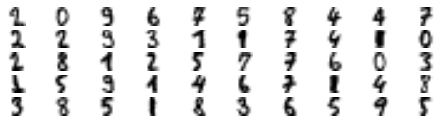

In [77]:
import numpy as np
k= 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')


In [80]:
y_train[representative_digit_idx]
y_representative_digits = np.array([2, 0, 9, 6, 7, 5, 8, 4, 4, 7, 2, 2, 9, 3, 1, 1, 7, 4, 1, 0, 2, 8,
       1, 2, 5, 7, 7, 6, 0, 3, 1, 5, 9, 1, 4, 6, 7, 1, 4, 8, 3, 8, 5, 1,
       8, 3, 6, 5, 9, 5])
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9155555555555556

In [81]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)


0.9066666666666666